 # Heart Disease Predicition.

There are many types of heart disease that occur in humans. By considering the diagnostic test, carried out based on symptoms, about heart disease a predication from the sample of population is elicited. Cleveland's solely heart disease dataset is drived from the UCI repository for analysis purpose.

The link of the dataset is secured here:
https://archive.ics.uci.edu/ml/datasets/Heart+Disease
 


## Aim of analysis.
To predict occurence of heart disease from the sample popluation. Among fourteen distinct numeric attribute, chest pain type, fasting bloog sugar, are used to predict the disease status. Below comparison and similaried of the data are been presented, using visualization and statistics techniques, to identify what symptoms leads to heart disease.

### 1. Processing dataset.

  #### 1.1. Read Data from CSV file.

In [2]:
import pandas as pds
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
%matplotlib notebook

# Used read_csv() of panda to read the data(values).
# Passing file path as first argument.

heart_dataset = pds.read_csv('https://raw.githubusercontent.com/kulbushan/Heart_disease_dataset/master/heart.csv', encoding="Latin-1")
heart_dataset.shape

(303, 14)

##### 1.1.1 Infomation about data.

In [27]:
# Provides information about the data type, for individual columns in the data set.
heart_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
Age                             303 non-null int64
Sex                             303 non-null int64
Chest_Pain_Type                 303 non-null int64
Resting_Blood_Pressure          303 non-null int64
Serum_Cholestoral               303 non-null int64
Fasting_Blood_Sugar             303 non-null int64
Resting_Electrocardiographic    303 non-null int64
Max_Heart_Rate_Achieved         303 non-null int64
 Old_Peak                       303 non-null float64
Slope_ST_Segment                301 non-null float64
Colored_Fluoroscopy             303 non-null int64
Thalassemia                     302 non-null float64
Heart_Disease                   303 non-null int64
count                           303 non-null int64
age_group                       303 non-null category
dtypes: category(1), float64(3), int64(11)
memory usage: 33.7 KB


In [11]:
# Code snippet appends "age_group" column to add data group wise.
heart_dataset['count'] = 1
heart_dataset['age_group'] = pds.cut(heart_dataset.Age, [10, 19, 20, 29, 30, 49, 50, 59, 70, 79])
dfs = heart_dataset.pivot_table('count', index='age_group', columns='Sex', aggfunc='sum').fillna(0)

#### 1.2. Glimpse of the heart disease.

In [3]:
# To generte first few observation from the heart disease dataset.
heart_dataset.head(4)

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate_Achieved,Exercise_Induced_Angina,Old_Peak,Slope_ST_Segment,Colored_Fluoroscopy,Thalassemia,Heart_Disease
0,63,1,3,145,233,1,0,150,0,2.3,0.0,0,NaN,1
1,37,1,2,130,250,0,1,187,0,3.5,0.0,0,2.0,1
2,41,0,1,130,204,0,0,172,0,1.4,2.0,0,2.0,1
3,56,1,1,120,236,0,1,178,0,0.8,2.0,0,2.0,1


#### 1.3. Visualization of data set.

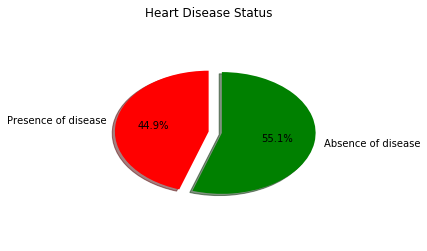

In [5]:
# Code snippet presents, using pie chart, the differnce of absensce and presence of heart disease in total from the dataset.

presence = heart_dataset.loc[heart_dataset['Heart_Disease'] == 1, 'Sex'].sum()
absence = heart_dataset.loc[heart_dataset['Heart_Disease'] == 0, 'Sex'].sum()
activities = ['Presence of disease', 'Absence of disease']
cols = ['red', 'green']
list_gender = [presence, absence]
plt.pie(list_gender,
       labels = activities,
       colors = cols,
       radius = 0.7,
       startangle = 90,
       shadow = True,
       explode = (0, 0.1),
       autopct = '%1.1f%%')

plt.title('Heart Disease Status')
plt.show()

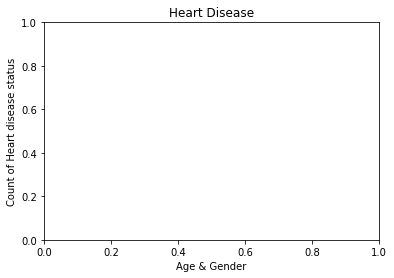

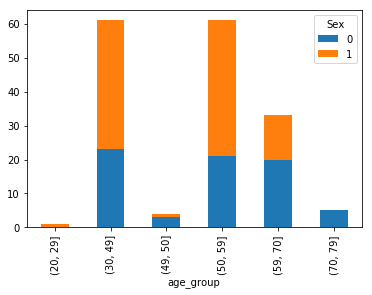

In [8]:
# Code snippet presents, using stacked graph, the age group, gender and heart disease wise data. The data on the y-axis elicits 
# the accumulation of number of heart disease and x-axis presents age group wise(including gender) data presence.

var = heart_dataset.groupby(['age_group', 'Sex']).Heart_Disease.sum()
fig = plt.figure()
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_xlabel('Age & Gender')
ax1.set_ylabel('Count of Heart disease status')
ax1.set_title("Heart Disease")
var.unstack().plot(kind='bar', stacked=True)

##### Observation2.
<a id='observation2'></a>

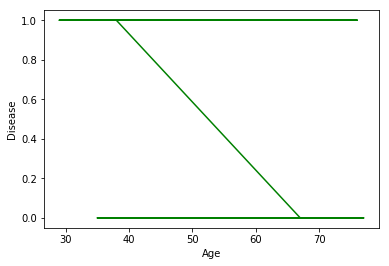

In [30]:
# Code snippet is used to represents the age as a bin on x-axis and presence(1), absence(0) of heart disease on y-axis.
plt.plot(heart_dataset.Age, heart_dataset.Heart_Disease, color='Green')
plt.ylabel('Disease')
plt.xlabel('Age')
plt.show()                                                                                                    
plt.close()

<BarContainer object of 303 artists>

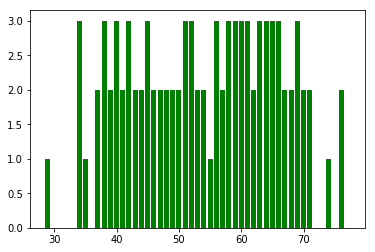

In [19]:
# Code snippet used to repesent the age as a bin on x-axis and chest pain type(categories) on y-axis.
# Chest pain categories been: 1 - typical angina, 2 - atypical angina, 3 - non-anginal pain, 0 - asymptomatic.
age = heart_dataset['Age']
cp = heart_dataset['Chest_Pain_Type']
plt.bar(age, cp, label ='Chest Pain', color='Green')

### 2. Data cleaning.

In [3]:
# Identifying missing data in particular attribute.
heart_dataset.isnull().sum()

Age                             0
Sex                             0
Chest_Pain_Type                 0
Resting_Blood_Pressure          0
Serum_Cholestoral               0
Fasting_Blood_Sugar             0
Resting_Electrocardiographic    0
Max_Heart_Rate_Achieved         0
Exercise_Induced_Angina         0
 Old_Peak                       0
Slope_ST_Segment                2
Colored_Fluoroscopy             0
Thalassemia                     1
Heart_Disease                   0
dtype: int64

#### 2.1 Handling missing data.

In [49]:
# Identifying missing data in total.
heart_dataset.isna().sum().sum()

3

In [45]:
# Replacing the missing data based on column.
heart_dataset["Slope_ST_Segment"].fillna(0, inplace=True)

In [53]:
# # Replacing the missing data based on column.
heart_dataset['Thalassemia'].fillna(2.0, inplace=True)

#### 2.2. Removing irrelevant column.

In [2]:
# Removing irrelevant column.
del heart_dataset['Exercise_Induced_Angina']

In [3]:
# Review of attribute after replacing and removing with appropriate data.
heart_dataset.isnull().sum()

Age                             0
Sex                             0
Chest_Pain_Type                 0
Resting_Blood_Pressure          0
Serum_Cholestoral               0
Fasting_Blood_Sugar             0
Resting_Electrocardiographic    0
Max_Heart_Rate_Achieved         0
 Old_Peak                       0
Slope_ST_Segment                2
Colored_Fluoroscopy             0
Thalassemia                     1
Heart_Disease                   0
dtype: int64

### 3. Analysis.

#### 3.1. Quantization of maximum heart rate.

In [63]:
# Quantization based on the heart rate achieved by individual.
q = pds.qcut(heart_dataset['Max_Heart_Rate_Achieved'], 10)
q

0       (146.0, 153.0]
1       (176.6, 202.0]
2       (170.0, 176.6]
3       (176.6, 202.0]
4       (159.0, 163.0]
5       (146.0, 153.0]
6       (146.0, 153.0]
7       (170.0, 176.6]
8       (159.0, 163.0]
9       (170.0, 176.6]
10      (159.0, 163.0]
11      (130.0, 140.6]
12      (170.0, 176.6]
13      (140.6, 146.0]
14      (159.0, 163.0]
15      (153.0, 159.0]
16      (170.0, 176.6]
17     (70.999, 116.0]
18      (170.0, 176.6]
19      (146.0, 153.0]
20      (159.0, 163.0]
21      (176.6, 202.0]
22      (176.6, 202.0]
23      (130.0, 140.6]
24      (176.6, 202.0]
25      (159.0, 163.0]
26      (153.0, 159.0]
27      (116.0, 130.0]
28      (153.0, 159.0]
29      (146.0, 153.0]
            ...       
273     (153.0, 159.0]
274     (116.0, 130.0]
275     (163.0, 170.0]
276    (70.999, 116.0]
277     (140.6, 146.0]
278     (146.0, 153.0]
279     (116.0, 130.0]
280     (116.0, 130.0]
281     (153.0, 159.0]
282     (130.0, 140.6]
283     (176.6, 202.0]
284     (130.0, 140.6]
285     (11

#### 3.2. Grouping data.

##### Observation 1
<a id='observation1'></a>

In [31]:
# Grouping data based on gender and heart disease status(presence or absence).
heart_dataset.groupby(['Sex', 'Heart_Disease'])['Fasting_Blood_Sugar'].sum()

Sex  Heart_Disease
0    0                 6
     1                 6
1    0                16
     1                17
Name: Fasting_Blood_Sugar, dtype: int64

In [39]:
# Grouping data based on gender and heart disease status(presence or absence) 
# and elicited the total count of fasting blood sugar based on group of individuals.

heart_dataset[heart_dataset['Fasting_Blood_Sugar']==1].groupby(['Sex', 'Heart_Disease'])['Fasting_Blood_Sugar'].count()

Sex  Heart_Disease
0    0                 6
     1                 6
1    0                16
     1                17
Name: Fasting_Blood_Sugar, dtype: int64

In [15]:
# Grouping data based on age group attribute, elicited total number of gender(male, and female) in particular group.
age_grp = heart_dataset.groupby(['age_group']).size()
age_grp

age_group
(10, 19]      0
(19, 20]      0
(20, 29]      1
(29, 30]      0
(30, 49]     87
(49, 50]      7
(50, 59]    118
(59, 70]     84
(70, 79]      6
dtype: int64

In [22]:
# Grouping data based on age group attribute, gender (male =1 and female =0), 
# and heart disease(presence =1 and absence =0),to achieve mean.
heart_dataset.groupby(['age_group','Sex', 'Heart_Disease'])['Max_Heart_Rate_Achieved'].mean()

age_group  Sex  Heart_Disease
(20, 29]   1    1                202.000000
(30, 49]   0    0                136.000000
                1                162.913043
           1    0                145.280000
                1                171.052632
(49, 50]   0    1                159.666667
           1    0                139.000000
                1                163.000000
(50, 59]   0    0                141.000000
                1                154.333333
           1    0                136.851064
                1                159.025000
(59, 70]   0    0                144.000000
                1                148.450000
           1    0                135.131579
                1                140.846154
(70, 79]   0    1                130.800000
           1    0                162.000000
Name: Max_Heart_Rate_Achieved, dtype: float64

In [21]:
# Grouping data based on age group attribute, gender (male =1 and female =0), 
# and heart disease(presence =1 and absence =0),to acquire fasting blood sugar in total.
heart_dataset.groupby(['age_group','Sex', 'Heart_Disease'])['Fasting_Blood_Sugar'].sum()

age_group  Sex  Heart_Disease
(20, 29]   1    1                 0
(30, 49]   0    0                 1
                1                 0
           1    0                 2
                1                 3
(49, 50]   0    1                 0
           1    0                 0
                1                 0
(50, 59]   0    0                 3
                1                 3
           1    0                 8
                1                10
(59, 70]   0    0                 2
                1                 2
           1    0                 6
                1                 4
(70, 79]   0    1                 1
           1    0                 0
Name: Fasting_Blood_Sugar, dtype: int64

#### 3.3. Performing statistics on dataset.

In [5]:
# Build simple statistics based of dataset using describe() function of panda.
heart_dataset.head().describe(include=[np.number])

,Age,Sex,Chest_Pain_Type,Resting_Blood_Pressure,Serum_Cholestoral,Fasting_Blood_Sugar,Resting_Electrocardiographic,Max_Heart_Rate_Achieved,Old_Peak,Slope_ST_Segment,Colored_Fluoroscopy,Thalassemia,Heart_Disease
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.0,4.0,5.0
mean,50.800000,0.600000,1.400000,129.000000,255.400000,0.200000,0.600000,170.00000,1.720000,1.200000,0.0,2.0,1.0
std,11.189281,0.547723,1.140175,10.246951,57.600347,0.447214,0.547723,14.19507,1.194571,1.095445,0.0,0.0,0.0
min,37.000000,0.000000,0.000000,120.000000,204.000000,0.000000,0.000000,150.00000,0.600000,0.000000,0.0,2.0,1.0
25%,41.000000,0.000000,1.000000,120.000000,233.000000,0.000000,0.000000,163.00000,0.800000,0.000000,0.0,2.0,1.0
50%,56.000000,1.000000,1.000000,130.000000,236.000000,0.000000,1.000000,172.00000,1.400000,2.000000,0.0,2.0,1.0
75%,57.000000,1.000000,2.000000,130.000000,250.000000,0.000000,1.000000,178.00000,2.300000,2.000000,0.0,2.0,1.0
max,63.000000,1.000000,3.000000,145.000000,354.000000,1.000000,1.000000,187.00000,3.500000,2.000000,0.0,2.0,1.0


In [24]:
## Based on grouping data finding minimum and maximum Resting_Blood_Pressure from the dataset.
heart_dataset.groupby(["Heart_Disease"])["Resting_Blood_Pressure"].min().astype(str) + ', ' +  heart_dataset.groupby(["Heart_Disease"])["Resting_Blood_Pressure"].max().astype(str)

Heart_Disease
0    100, 200
1     94, 180
Name: Resting_Blood_Pressure, dtype: object

In [7]:
# Build simple statistics based of dataset using functions of Numpy.

# Calculation using min, max, standard deviation, mean, and average on gender attribute based on chest pain and heart disease.
datanp = np.genfromtxt("https://raw.githubusercontent.com/kulbushan/Heart_disease_dataset/master/heart.csv", names =True, 
                       delimiter=',', dtype = None)
datanp

def gendercalulation(sex, x):
    return (datanp['Sex'] == x).sum()


summary_list = []
for cp_np in np.unique(datanp['Chest_Pain_Type']):
    for heart_np in np.unique(datanp['Heart_Disease']):
        data_to_sum = datanp[(datanp['Chest_Pain_Type'] == cp_np) & (datanp['Heart_Disease'] == heart_np)]
        
        mean = data_to_sum['Sex'].mean()
        sd = data_to_sum['Sex'].std()
        max_sex = data_to_sum['Sex'].max()
        min_sex =  data_to_sum['Sex'].min()
        sum_male =  gendercalulation(data_to_sum, 1) / data_to_sum['Sex'].sum()
        sum_female = gendercalulation(data_to_sum, 0) /  data_to_sum['Sex'].sum()
        ps = np.percentile(data_to_sum['Sex'], [25, 75] )
        #summary_list.append((mean, sd, max_sex, min_sex, ps[0], ps[1], cp_np, heart_np, sum_male, sum_female))
        summary_list.append((cp_np, heart_np, sum_male, sum_female))


In [36]:
# Generating sample list containing paramerter: chest pain category, heart disease status(presence/absence), 
# average of male, and average of female.

results = np.array(summary_list, dtype=None)
np.set_printoptions(suppress=True)
print(results)

[[ 0.          0.          2.4939759   1.15662651]
 [ 0.          1.          9.85714286  4.57142857]
 [ 1.          0.         29.57142857 13.71428571]
 [ 1.          1.          8.28        3.84      ]
 [ 2.          0.         12.17647059  5.64705882]
 [ 2.          1.          5.91428571  2.74285714]
 [ 3.          0.         29.57142857 13.71428571]
 [ 3.          1.         17.25        8.        ]]


##### Observation 3
<a id=observation3></a>

In [38]:
# Considering the statistics, an observation can be drawn that from a sample population: On an average, 
# more number of male tend to have heart disease in contrast with female.

print((str(summary_list[7:]).strip('[]')))

(3, 1, 17.25, 8.0)


In [16]:
# Code snippet generates number of indiviuals for male(1) and female(0) category.
gender = heart_dataset["Sex"].value_counts(dropna=False)
gender

1    207
0     96
Name: Sex, dtype: int64

In [18]:
# Code snippet generates number of indiviuals for each category:  
# 1 - typical angina, 2 - atypical angina, 3 - non-anginal pain, 0 - asymptomatic.
cp_typ = heart_dataset["Chest_Pain_Type"].value_counts(dropna=False)
cp_typ

0    143
2     87
1     50
3     23
Name: Chest_Pain_Type, dtype: int64

### 4. Conclusion.

**1.** From [observation 1](#observation1): <br>
_1.1._ The observation has compared fasting blood sugar in male's with presence(fbs > 120 mg/dL) and absence(fbs < 120 mg/dL) and found that they are essentially identical. <br>
_1.2._  Unlike than male's, there are 1 percent of female's with higher number of milligrams per decilitre of fasting blood tend to have heart disease. <br>
**2.** From the [observation 2](#observation2), we can roughly predict that people with age group between 40 to 68 are in tendency to have heart disease. <br>
**3.** Predication based on [observation 3](#observation3) manifests that, in contrast to females, the data manifest that there is seventeen percent on an average male, with non-anginal chest pain which resulted to cause heart disease. <br>



Considering visualization and predictive modelling techniques on given Cleveland heart disease dataset, a conclusion can be drawn, that, individual with gender as **male**,  **chest pain type > 0**, **30 < age < 69** , **fasting blood sugar < 120 mg/dl**  (**) are likely to result in presence of heart disease.